# Problem Formulation

In [ ]:
1 Define the problem  ?

The problem is to creat a model that can predict the rating of the 
products before selling it to the customers to know hwe he is going to react about it so we could 
increase the return profit

2 What is the input ? 
 the input is previous data from wish.com like the price of the items and the id of the coustomer 
 to obtain the rating

3 What is the output?
Rating of the products 

4 What data mining function is required ?
The model is classification model.
  classification is the technique to categorize elements in a collection,
  basis their predefined functionalities and properties. In classification,
  the model can classify new instances whose classification is unknown.
  These particular instances that are used to create the model are called training data.
  Such a mechanism of classification uses methods like if-then,
  decision trees, neural networks, or even a set of classification rules
  These methods can be retrieved to identify future data.

5 What could be the challenges ?
The challenges that we have is to clean the data froma the noise in the 
dataset and preprocessing and the train and tist data is not the same amount

6 What is the impact ?
The impact is to obtain the rating to 
predict and classify the right rating for each 
model so we could increase the return profit


7 What is an ideal solution ?
to my rate (destion tree)after making appropriate preprocessing 
on the dataset and take the columns that will 
help the model to predict the right rating 

#Imports

In [2]:
# normal imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
# sklearn imports
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score,\
                            accuracy_score,classification_report,\
                            plot_roc_curve,plot_confusion_matrix,precision_recall_fscore_support
                            
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# disable warnings i hate them
import warnings
warnings.filterwarnings('ignore')

#Frist look on the data 


In [5]:
df_train= pd.read_csv("/content/train_new.csv")   #reading train data       
df_train.head()       #


,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [6]:
df_train.shape     #explore the shape of the train data frame

(1094, 34)

In [7]:
df_test= pd.read_csv("/content/test_new.csv")   #reading test data
df_test.head

<bound method NDFrame.head of      price  retail_price currency_buyer  ...   theme  crawl_month    id
0     5.75             5            EUR  ...  summer      2020-08   937
1     7.00             7            EUR  ...  summer      2020-08   270
2     5.00            16            EUR  ...  summer      2020-08   308
3    18.00            27            EUR  ...  summer      2020-08   913
4    12.00            81            EUR  ...  summer      2020-08   403
..     ...           ...            ...  ...     ...          ...   ...
474  16.00            14            EUR  ...  summer      2020-08  1166
475   6.00            17            EUR  ...  summer      2020-08  1416
476   4.83            51            EUR  ...  summer      2020-08    63
477   3.00             3            EUR  ...  summer      2020-08   626
478  13.00            11            EUR  ...  summer      2020-08   196

[479 rows x 33 columns]>

In [8]:
df_test.shape  #explore the shape of the test data frame

(479, 33)

# Data concat

In [9]:
df_test['rating']=0      # ading the lable (rating) to test data because it not excit in test data but it is in train data

df = pd.concat([df_train , df_test] , ignore_index=True , sort=False) 
df.shape                 # concat the train and test data to work on both of them 


(1573, 34)

# Data exploration

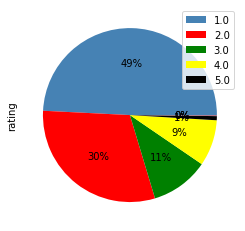

In [10]:
df['rating'].value_counts().plot.pie(autopct='%1.0f%%',
                                     colors = ['steelblue','red','green','yellow','black'],
                                     labels = None);
plt.legend(labels = [1.0,2.0,3.0,4.0,5.0]);

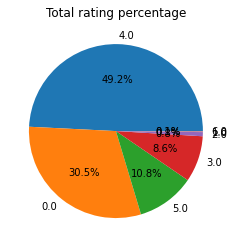

In [11]:
rate = df['rating'].value_counts() #explor rating persentage
rate.plot.pie(title ='Total rating percentage', ylabel='', autopct='%1.1f%%');

In [12]:
total = df.isnull().sum().sort_values(ascending=False) #counts the null vaalues in each columnfrom high to low
total

merchant_profile_picture        1347
has_urgency_banner              1100
urgency_text                    1100
product_color                     41
origin_country                    17
product_variation_size_id         14
merchant_name                      4
merchant_info_subtitle             1
merchant_title                     0
price                              0
countries_shipped_to               0
merchant_rating_count              0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
theme                              0
crawl_month                        0
inventory_total                    0
shipping_is_express                0
retail_price                       0
shipping_option_price              0
shipping_option_name               0
product_variation_inventory        0
tags                               0
badge_fast_shipping                0
badge_product_quality              0
badge_local_product                0
b

In [13]:
# missing values percentage per-column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

merchant_profile_picture        0.856325
has_urgency_banner              0.699301
urgency_text                    0.699301
product_color                   0.026065
origin_country                  0.010807
product_variation_size_id       0.008900
merchant_name                   0.002543
merchant_info_subtitle          0.000636
merchant_title                  0.000000
price                           0.000000
countries_shipped_to            0.000000
merchant_rating_count           0.000000
merchant_rating                 0.000000
merchant_id                     0.000000
merchant_has_profile_picture    0.000000
theme                           0.000000
crawl_month                     0.000000
inventory_total                 0.000000
shipping_is_express             0.000000
retail_price                    0.000000
shipping_option_price           0.000000
shipping_option_name            0.000000
product_variation_inventory     0.000000
tags                            0.000000
badge_fast_shipp

,Total,Percent
merchant_profile_picture,1347,0.856325
has_urgency_banner,1100,0.699301
urgency_text,1100,0.699301
product_color,41,0.026065
origin_country,17,0.010807
product_variation_size_id,14,0.008900
merchant_name,4,0.002543
merchant_info_subtitle,1,0.000636
merchant_title,0,0.000000
price,0,0.000000


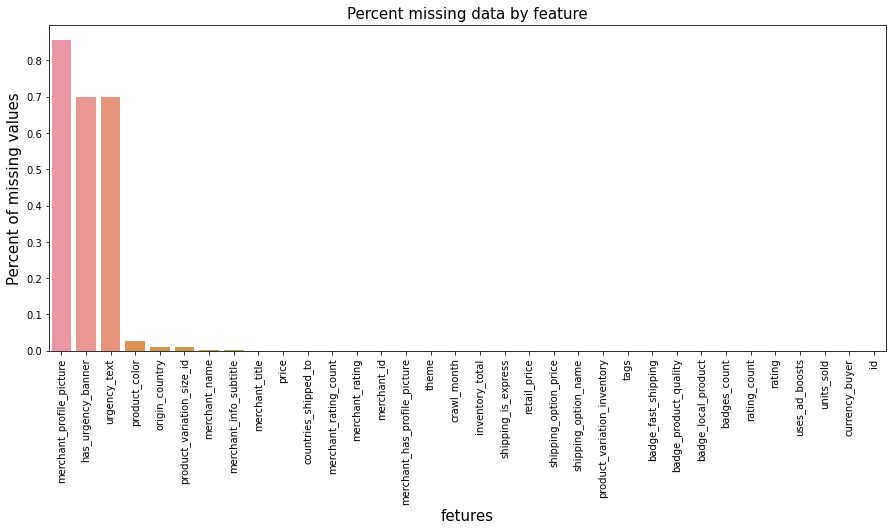

In [14]:
# plot the count of the null vaalues in each column from high to low and # missing values percentage per-column togrther
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('fetures', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

### Visualizing numeric values

In [15]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'id'],
      dtype='object')

In [16]:

import plotly.express as px
fig1 = px.imshow(df_numeric.corr())
fig1.show()

### Visualizing categorical columns

In [17]:
df_categorical = df.select_dtypes(include =['object'])
df_categorical.columns

Index(['currency_buyer', 'tags', 'product_color', 'product_variation_size_id',
       'shipping_option_name', 'urgency_text', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_id', 'merchant_profile_picture', 'theme', 'crawl_month'],
      dtype='object')

##Investigating data

In [18]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   badges_count                  1573 non-null   int64  
 8   badge_local_product           1573 non-null   int64  
 9   badge_product_quality         1573 non-null   int64  
 10  badge_fast_shipping           1573 non-null   int64  
 11  tags                          1573 non-null   object 
 12  product_color                 1532 non-null   object 
 13  pro

In [19]:
# dataframe.info(verbose,buf=buffer,max_cols,memory_usage,show_counts,null_counts)
df.info(verbose=True,max_cols=34,memory_usage=True,show_counts=True)  #Investigating data
# df.info()  #another way without using parameters of df.info function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   badges_count                  1573 non-null   int64  
 8   badge_local_product           1573 non-null   int64  
 9   badge_product_quality         1573 non-null   int64  
 10  badge_fast_shipping           1573 non-null   int64  
 11  tags                          1573 non-null   object 
 12  product_color                 1532 non-null   object 
 13  pro

In [20]:
df.isnull() #diffrent way to insure if there is null values to delete 

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False
1569,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1570,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1571,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [21]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,2.786395,889.659250,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675,786.000000
std,3.932030,30.357863,9356.539302,0.495639,1.907903,1983.928834,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871,454.230301
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000,0.000000
25%,5.810000,7.000000,100.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000,393.000000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,150.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000,786.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,855.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000,1179.000000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000,1572.000000


In [22]:
# Unique values
for column in df.columns:
  print(column)
  print(df[column].unique())

price
[ 8.    6.    4.67 14.    3.67  9.   19.   12.    5.74 13.   11.   18.
  5.    2.   15.    3.    5.91  1.72  7.    3.81 16.    1.74  5.83  5.79
  1.66  5.65  5.87  4.68  5.9   4.81  1.77  5.66 22.    4.66  3.73  3.91
  5.73  3.94  3.69  1.86  1.88  2.83  4.93  2.81  5.84  3.7   3.71 17.
  1.    5.81  4.84  4.    5.95  5.77  4.83  3.83  1.7   3.86  1.76  5.86
  5.85  3.88  5.69  5.72  1.89  4.9   2.71  3.72  5.75  3.92  3.66  2.67
  5.71  5.8   3.93  3.68  2.76  5.82  3.85 25.    5.7   3.76  3.9   2.72
  4.69 27.    5.67  2.89  4.86  4.94  1.84  2.66  4.74  3.74  1.75  5.78
  2.9   5.88  5.68  3.87  1.91 23.    2.65  3.65  5.89  1.68  4.65  1.85
 26.   20.   24.   49.    5.92  2.8   2.69  1.8   4.73  2.79  3.78  4.7
  3.84  1.65  2.7   4.88  3.79  1.67  1.71]
retail_price
[  7  34   4  11  51   9   8  21   5  10  16  15   6  38   2  13   3  87
  17  26  59 152  43 115  25  56 107  31  42  50  68  70  60  22  75  76
 102  20 159  14  19 104  72  30 169  84  27  12  85  33 106  53  

# Cleaning data

In [23]:
# First, lets drop duplicates (if any)
df.drop_duplicates(inplace=True)

In [24]:
df

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,16.00,14,EUR,100,1,0.0,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,50,Livraison standard,4,0,35,50,NaN,NaN,VE,HERNADEZYELI,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
1569,6.00,17,EUR,5000,1,0.0,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,1,Livraison standard,2,0,41,50,NaN,NaN,CN,First Crush,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
1570,4.83,51,EUR,50,1,0.0,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,3,Livraison standard,1,0,39,50,1.0,Quantité limitée !,VE,saulstore,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
1571,3.00,3,EUR,100,1,0.0,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,34,3,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,lkwelyly,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


## Dropping usless fetures

In [25]:
df.drop("currency_buyer",axis = 1, inplace=True)              #currency is only in EUR 
column
df.drop("theme",axis = 1, inplace=True)                       #drop becasue it has one value
df.drop("id",axis = 1, inplace=True)                          
df.drop("urgency_text",axis = 1, inplace=True)                #almost all nan value  
df.drop("has_urgency_banner",axis = 1, inplace=True)          #almost all nan value  
df.drop("merchant_profile_picture",axis = 1, inplace=True)    #i think it is not gonna be helpful to train url ????
# df.drop("merchant_name",axis = 1, inplace=True)                
df.drop("merchant_title",axis = 1, inplace=True)              # enough to use the marchant name
# df.drop("tags",axis = 1, inplace=True)
df.drop("uses_ad_boosts",axis = 1, inplace=True)
df.drop("badges_count",axis = 1, inplace=True)
# df.drop("product_color",axis = 1, inplace=True)
df.drop("product_variation_inventory",axis = 1, inplace=True)
df.drop("shipping_option_name",axis = 1, inplace=True)
# df.drop("inventory_total",axis = 1, inplace=True)
df.drop("origin_country",axis = 1, inplace=True)
df.drop("merchant_info_subtitle",axis = 1, inplace=True)       #un it is not understandable
df.drop("merchant_id",axis = 1, inplace=True)                  #it decreses the acuurecy rate
df.drop("crawl_month",axis = 1, inplace=True)                  #it has one value
# df.drop("product_variation_size_id",axis = 1, inplace=True)
df.drop("shipping_is_express",axis = 1, inplace=True) #Almost all the shipping is not express so we can drop it.



In [ ]:
df

,price,retail_price,units_sold,rating,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,4.0,1670,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,3,0,30,50,NaN,66644,4.137582,1
1,8.00,7,1000,4.0,843,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,3,0,37,50,NaN,25752,4.256873,0
2,6.00,34,100,4.0,10,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,2,0,41,50,NaN,3897,3.928920,0
3,4.67,4,100,3.0,82,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,1,0,25,50,NaN,7497,4.079365,0
4,8.00,11,1000,4.0,127,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,3,0,15,50,1.0,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,16.00,14,100,0.0,27,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,4,0,35,50,NaN,572,3.367133,0
1569,6.00,17,5000,0.0,817,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,2,0,41,50,NaN,50864,4.079644,1
1570,4.83,51,50,0.0,1,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,1,0,39,50,1.0,57,3.824561,0
1571,3.00,3,100,0.0,8,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,34,1,0,26,50,1.0,1086,4.056169,0


## replacing wrong value

In [91]:
df.at[971,'rating']=5  # the rating is from 1 to 5 
#so we have to reblase the orignal value which is equal to 6 and make it 5

6.0

## ONE hot encoding

In [ ]:
# # SHOULD I USE ONE HOT ENCODING AND WHY ????????????


# # columns_names =  ['units_sold','rating_count','badge_product_quality','product_variation_size_id','shipping_option_price','countries_shipped_to','merchant_rating_count','merchant_rating','crawl_month']
# columns_names = ['product_variation_size_id']
# df_hot_encoded = pd.get_dummies(df, prefix=columns_names, columns= columns_names)
# df=df_hot_encoded 


KeyError: ignored

## Univariate feature imputation

### Numeric data

In [27]:
import numpy as np
from sklearn.impute import SimpleImputer
fill_nan = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=1)

# transform training numbers
train_numeric_features = fill_nan.fit_transform(df_train.select_dtypes(include=np.number))


test_numeric_features = fill_nan.transform(df_test.select_dtypes(include=np.number))

# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_numeric_features, 
    columns=df_test.select_dtypes(include=np.number).columns
    )

cleaned_train = pd.DataFrame(
    train_numeric_features, 
    columns=df_train.select_dtypes(include=np.number).columns
    )


# check again for missing
cleaned_train.isnull().sum().sort_values(ascending=False)
cleaned_test.isnull().sum().sort_values(ascending=False)

price                           0
retail_price                    0
id                              0
merchant_has_profile_picture    0
merchant_rating                 0
merchant_rating_count           0
has_urgency_banner              0
inventory_total                 0
countries_shipped_to            0
shipping_is_express             0
shipping_option_price           0
product_variation_inventory     0
badge_fast_shipping             0
badge_product_quality           0
badge_local_product             0
badges_count                    0
rating_count                    0
uses_ad_boosts                  0
units_sold                      0
rating                          0
dtype: int64

In [28]:
import numpy as np
from sklearn.impute import SimpleImputer

# we use mean strategy - you can also use median or most_frequent
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# estimate mean value from training setn and transform training numbers
train_numeric_features = imp.fit_transform(
    df_train.select_dtypes(include=np.number))


test_numeric_features = imp.transform(
    df_test.select_dtypes(include=np.number))


# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_numeric_features, 
    columns=df_test.select_dtypes(include=np.number).columns
    )

# check again for missing
cleaned_test.isnull().sum().sort_values(ascending=False)

price                           0
retail_price                    0
id                              0
merchant_has_profile_picture    0
merchant_rating                 0
merchant_rating_count           0
has_urgency_banner              0
inventory_total                 0
countries_shipped_to            0
shipping_is_express             0
shipping_option_price           0
product_variation_inventory     0
badge_fast_shipping             0
badge_product_quality           0
badge_local_product             0
badges_count                    0
rating_count                    0
uses_ad_boosts                  0
units_sold                      0
rating                          0
dtype: int64

### Categorical data

In [29]:
import numpy as np
from sklearn.impute import SimpleImputer

# replace with constant
imp = SimpleImputer(strategy='constant', fill_value='sad')

# here select only categorical features
train_categorical_features = imp.fit_transform(
    df_train.select_dtypes(include =['object']))


test_categorical_features = imp.transform(
    df_test.select_dtypes(include =['object']))


# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_categorical_features, 
    columns=df_test.select_dtypes(include =['object']).columns
    )

# check again for missing
cleaned_test.isnull().sum().sort_values(ascending=False)

currency_buyer               0
tags                         0
product_color                0
product_variation_size_id    0
shipping_option_name         0
urgency_text                 0
origin_country               0
merchant_title               0
merchant_name                0
merchant_info_subtitle       0
merchant_id                  0
merchant_profile_picture     0
theme                        0
crawl_month                  0
dtype: int64

In [30]:
# replace with most_frequent from training set
imp = SimpleImputer(strategy='most_frequent')

# here select only categorical features
train_categorical_features = imp.fit_transform(
    df_train.select_dtypes(include =['object']))


test_categorical_features = imp.transform(
    df_test.select_dtypes(include =['object']))


# the results above are numpy arrays
# you can make it back to a dataframe for either train/test array
cleaned_test = pd.DataFrame(
    test_categorical_features, 
    columns=df_test.select_dtypes(include =['object']).columns
    )

# check again for missing
cleaned_test.isnull().sum().sort_values(ascending=False)

currency_buyer               0
tags                         0
product_color                0
product_variation_size_id    0
shipping_option_name         0
urgency_text                 0
origin_country               0
merchant_title               0
merchant_name                0
merchant_info_subtitle       0
merchant_id                  0
merchant_profile_picture     0
theme                        0
crawl_month                  0
dtype: int64

In [31]:
cleaned_test

,currency_buyer,tags,product_color,product_variation_size_id,shipping_option_name,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_id,merchant_profile_picture,theme,crawl_month
0,EUR,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,Livraison standard,Quantité limitée !,CN,liyang163,liyang163,33 % avis positifs (3 notes),5e63469b2fdc774466e15dd5,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
1,EUR,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,Livraison standard,Quantité limitée !,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",583547f417dc6224cb464117,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
2,EUR,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,Livraison standard,Quantité limitée !,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",57086fd7fa6bee434d0e5852,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
3,EUR,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,Livraison standard,Quantité limitée !,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",5a17b55d1f4d8c4f0b44b0ce,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
4,EUR,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,Livraison standard,Quantité limitée !,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",53aa664438d3046ee44a5024,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,EUR,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,Livraison standard,Quantité limitée !,VE,HERNADEZYELI,hernadezyeli,70 % avis positifs (572 notes),5dc818ca030a154e48a3a8af,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
475,EUR,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,Livraison standard,Quantité limitée !,CN,First Crush,firstcrush,"87 % avis positifs (50,864 notes)",587f85cbb8038f4cb049c56c,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
476,EUR,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,Livraison standard,Quantité limitée !,VE,saulstore,saulstore,85 % avis positifs (57 notes),5e3c5fbfe217d492138970c1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
477,EUR,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,34,Livraison standard,Quantité limitée !,CN,lkwelyly,hey1827,"87 % avis positifs (1,086 notes)",5c6d6c28619caa1d94891d06,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08


##Multivariate feature imputation

In [32]:
## first, we have to convert all categorical to numeric:

# make a copy
df=df_converted = df.copy()

for col_name in df_converted.columns:
    if(df_converted[col_name].dtype == 'object'):
        df_converted[col_name] = df_converted[col_name].astype('category')
        df_converted[col_name] = df_converted[col_name].cat.codes
        

## Numeric feature handling

### Standardization

In [35]:
from sklearn import preprocessing
import numpy as np

# we use the previously converted dataframe 
# where all categorical features are now numeric
# and all missing values have been replaced
scaler = preprocessing.StandardScaler().fit(df)

# mean values for each column
print(scaler.mean_)

[8.32537190e+00 2.32886205e+01 4.33900509e+03 2.78639542e+00
 8.89659250e+02 1.84361093e-02 7.43801653e-02 1.27145582e-02
 6.10480610e+02 5.27711380e+01 6.53223140e+01 2.34520025e+00
 2.54291163e-03 4.04564526e+01 4.98213605e+01 1.00000000e+00
 2.64958328e+04 4.03234512e+00 1.43674507e-01]


In [36]:
train_features_preprocessed = scaler.transform(df)

# zero mean (or very close to zero) for each column
print('scaled data should have zero mean', train_features_preprocessed.mean(axis=0))

scaled data should have zero mean [-1.50194189e-16  4.85590236e-17 -2.93612701e-17  3.61369478e-17
  2.25855924e-18  3.38783885e-18 -8.13081325e-17  1.35513554e-17
 -1.15186521e-16  1.17445080e-16 -1.12927962e-16 -2.25855924e-18
  1.01635166e-17  9.93766064e-17 -1.16089945e-15             nan
  1.66568744e-17  4.78814558e-16 -3.61369478e-17]


In [37]:
# zero std (or very close to 1) for each column
print('scaled data should have 1 std', train_features_preprocessed.std(axis=0))

scaled data should have 1 std [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. nan  1.  1.
  1.]


### Scaling

In [38]:
from sklearn import preprocessing
import numpy as np

# we use the previously converted dataframe where all categorical features are now numeric and all missing values have been replaced
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(
    df)


In [46]:
train_features_preprocessed = scaler.transform(
    df)


print(train_features_preprocessed.min(axis=0))

[ 2.60255125e-06  2.29907354e-06  5.74739002e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.05915018e-03 -1.34986743e-03  4.59814708e-07
  0.00000000e+00  4.75387786e-05  2.29907354e-05  4.59814708e-07
  0.00000000e+00  2.00303927e-06  0.00000000e+00]


In [45]:
# max one for each column
print(train_features_preprocessed.max(axis=0))

[1.09003755e-01 4.78988621e-01 9.94356825e-01 3.58465121e-02
 4.34090760e-01 1.08757395e-03 4.59458776e-03 2.32442210e-03
 9.97087268e-01 7.00964754e-01 5.59205589e-01 3.27011265e-02
 1.61550180e-04 6.78844744e-01 3.89424863e-01 7.78849727e-03
 9.99999885e-01 2.98440733e-02 2.32442210e-03]


### Normalization

In [49]:
df=df.fillna(df.mean())


In [50]:
from sklearn import preprocessing
import numpy as np

# we use the previously converted dataframe  where all categorical features are now numeric  and all missing values have been replaced
scaler = preprocessing.Normalizer(norm='l2').fit(
    df)

In [51]:
train_features_preprocessed = scaler.transform(
   df)

In [52]:
# unit l2 norm
from numpy import linalg as LA
LA.norm(train_features_preprocessed, ord=2, axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

## Fill nan values

In [53]:
# 1
df.mean()


price                               8.325372
retail_price                       23.288620
units_sold                       4339.005086
rating                              2.786395
rating_count                      889.659250
badge_local_product                 0.018436
badge_product_quality               0.074380
badge_fast_shipping                 0.012715
tags                              610.480610
product_color                      52.771138
product_variation_size_id          65.322314
shipping_option_price               2.345200
shipping_is_express                 0.002543
countries_shipped_to               40.456453
inventory_total                    49.821360
has_urgency_banner                  1.000000
merchant_rating_count           26495.832804
merchant_rating                     4.032345
merchant_has_profile_picture        0.143675
dtype: float64

In [54]:
# 2
df=df.fillna(df.mean()) #fill nan value with its column mean



In [55]:
df.shape

(1573, 19)

## Splitting the the concated pd

In [56]:
df_train_indx = df_train.shape[0]
df_train_clean = df.iloc[: df_train_indx]
df_train_clean_indx = df.shape[0]
print(df_train_clean.shape)
df_test_indx = df_test.shape[0]
df_test_clean = df.iloc[df_train_indx : ]
print(df_test_clean.shape) 
df_test_clean= df_test_clean.drop('rating' , axis=1)



(1094, 19)
(479, 19)


In [57]:
df_test_clean.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
rating_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64

In [58]:
X = df_train_clean.loc[:, df.columns != 'rating']
Y = df_train_clean['rating']

In [59]:
X.shape

(1094, 18)

In [60]:

Y.shape

(1094,)

## # spliting the data into 80% Train , 20% Test

In [61]:
# 90 % Train , and 10 % Test
xtr , xts, ytr, yts = train_test_split(X,Y, test_size=0.1 , shuffle=True,random_state=2)

In [62]:
# print the percentage of each class in each set to make sure that the data is splitted correctly
print(ytr.value_counts()/ytr.shape)
print(yts.value_counts()/yts.shape)


4.0    0.706301
5.0    0.159553
3.0    0.119919
2.0    0.011179
1.0    0.002033
6.0    0.001016
Name: rating, dtype: float64
4.0    0.718182
3.0    0.154545
5.0    0.118182
2.0    0.009091
Name: rating, dtype: float64


# Traning & Testing

In [63]:
df_test_clean

,price,retail_price,units_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
1094,5.75,5,10,0,0,0,0,58,90,92,2,0,139,50,1.0,3,2.333333,0
1095,7.00,7,5000,579,0,0,0,845,13,92,2,0,31,50,1.0,4213,4.058391,0
1096,5.00,16,1000,62,0,0,0,1081,20,92,2,0,41,50,1.0,10501,4.029235,0
1097,18.00,27,5000,1903,0,0,0,1097,20,50,5,0,42,50,1.0,15855,4.052917,0
1098,12.00,81,20000,1799,0,0,0,172,90,50,3,0,38,50,1.0,151914,4.127921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,16.00,14,100,27,0,0,0,1099,13,50,4,0,35,50,1.0,572,3.367133,0
1569,6.00,17,5000,817,0,0,0,990,20,95,2,0,41,50,1.0,50864,4.079644,1
1570,4.83,51,50,1,0,0,0,966,90,92,1,0,39,50,1.0,57,3.824561,0
1571,3.00,3,100,8,0,0,0,764,13,25,1,0,26,50,1.0,1086,4.056169,0


### Decision tree 1

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()  # creat Decision tree model called dtree
dtree.fit(xtr,ytr)                # train the Decision tree model
#now lets test the accuracy
pred = dtree.predict(xts)
print(confusion_matrix(yts, pred))
print(classification_report(yts, pred))

[[ 0  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  8  7  2]
 [ 0  0  9 62  8]
 [ 1  0  0  4  8]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00         1
         3.0       0.47      0.47      0.47        17
         4.0       0.85      0.78      0.82        79
         5.0       0.44      0.62      0.52        13

    accuracy                           0.72       110
   macro avg       0.55      0.57      0.56       110
weighted avg       0.74      0.72      0.73       110



In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42,max_depth=15,min_samples_leaf=5,criterion="gini")   
dtree.fit(xtr,ytr)
#now lets test the accuracy
pred = dtree.predict(xts)
print(confusion_matrix(yts, pred))
print(classification_report(yts, pred))

[[ 0  0  0  1]
 [ 0  5 11  1]
 [ 0  7 68  4]
 [ 0  1  5  7]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.38      0.29      0.33        17
         4.0       0.81      0.86      0.83        79
         5.0       0.54      0.54      0.54        13

    accuracy                           0.73       110
   macro avg       0.43      0.42      0.43       110
weighted avg       0.70      0.73      0.71       110



In [66]:
y_pred = dtree.predict(df_test_clean)

[5. 4. 4. 4. 4. 5. 3. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 3. 5. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 5. 5. 4. 2. 5. 4. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 5. 4.
 3. 4. 3. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 2. 4.
 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 5. 4. 4. 3. 4. 4. 4.
 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 3.
 4. 4. 4. 4. 4. 4. 3. 4. 4. 5. 4. 4. 4. 5. 4. 4. 4. 2. 4. 2. 4. 4. 4. 4.
 4. 4. 4. 4. 3. 4. 5. 4. 3. 4. 4. 4. 4. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 3. 4. 4. 5. 3. 4. 4. 4. 3. 3. 4. 4. 4. 4. 4. 5.

In [38]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False)

## Decision tree 2

In [93]:

from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(random_state=1,max_depth=20,min_samples_leaf=10,criterion="entropy") # creat Decision tree model called dtree1  
dtree1.fit(xtr,ytr) #train the Decision tree model

#now lets test the accuracy
pred = dtree1.predict(xts)
print(confusion_matrix(yts, pred))
print(classification_report(yts, pred))

[[ 1  0  0  0]
 [ 0  4 10  3]
 [ 0  8 67  4]
 [ 1  1  3  8]]
              precision    recall  f1-score   support

         2.0       0.50      1.00      0.67         1
         3.0       0.31      0.24      0.27        17
         4.0       0.84      0.85      0.84        79
         5.0       0.53      0.62      0.57        13

    accuracy                           0.73       110
   macro avg       0.54      0.67      0.59       110
weighted avg       0.72      0.73      0.72       110



In [94]:
y_pred = dtree1.predict(df_test_clean)

[5. 4. 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 3. 4.
 3. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 3. 4. 4. 4. 2. 5.
 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 5. 5. 4. 5. 5. 4. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 5. 4.
 5. 4. 4. 4. 4. 3. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4.
 5. 4. 4. 4. 3. 4. 4. 3. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 4. 3. 3. 4. 4. 5. 4. 3. 4. 4. 4. 5. 4. 2. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 3. 4. 3. 5. 4. 4. 3. 3. 4. 5. 5. 3. 4. 4. 3. 4. 4. 4. 5. 4. 4.
 4. 3. 3. 5. 4. 4. 4. 4. 4. 4. 3. 4. 3. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 3. 4. 4. 3. 3. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 3. 4. 3. 5. 4. 4. 4. 5. 3. 4. 4. 4. 5. 5. 4. 5.

In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False) 

## Decision tree 3

In [102]:
df_test_clean.shape

(479, 16)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [40]:
dtree3 = DecisionTreeClassifier() # creat Decision tree model called dtree3

#Apply hyper parameter tuning
dt_param_grid = [{'criterion': ['gini', 'entropy'],'max_depth': list(range(10,15,2))}]
classifier_dt = GridSearchCV(dtree, dt_param_grid, cv=10)
best_dt = classifier_dt.fit(xtr,ytr).best_estimator_
# print(f"{best_dt.max_depth = }\n{best_dt.criterion = }\n")
best_dt = dtree3.fit(xtr,ytr)
pred_dt = best_dt.predict(df_test_clean)

In [41]:
dtree3 = DecisionTreeClassifier(random_state=3)
dtree3.fit(xtr, ytr) #train the Decision tree model

DecisionTreeClassifier(random_state=3)

In [42]:
y_pred = dtree3.predict(xts)
print(confusion_matrix(yts, y_pred))
print(classification_report(yts, y_pred))

[[ 0  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0 10  6  1]
 [ 0  0  9 63  7]
 [ 1  0  1  3  8]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00         1
         3.0       0.50      0.59      0.54        17
         4.0       0.88      0.80      0.83        79
         5.0       0.50      0.62      0.55        13

    accuracy                           0.75       110
   macro avg       0.57      0.60      0.59       110
weighted avg       0.77      0.75      0.76       110



In [43]:
y_pred = dtree3.predict(df_test_clean)

[5. 4. 4. 4. 4. 5. 3. 4. 4. 3. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 4. 5. 3. 3.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 3. 3. 5. 5.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 3. 4. 5. 3. 4. 5. 5. 4. 3. 5. 4. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 4. 5. 4. 4. 5. 4. 4. 5. 4. 5. 4.
 5. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 5. 4. 2. 4.
 4. 4. 3. 4. 3. 4. 4. 4. 4. 4. 3. 4. 4. 4. 5. 4. 4. 4. 4. 4. 3. 4. 4. 4.
 4. 4. 4. 5. 4. 3. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 4. 4. 4. 3.
 4. 4. 4. 3. 4. 3. 3. 4. 4. 5. 4. 4. 4. 5. 4. 4. 4. 3. 5. 3. 4. 4. 4. 4.
 4. 4. 4. 3. 4. 4. 5. 3. 4. 3. 4. 3. 4. 4. 3. 3. 4. 3. 4. 4. 3. 5. 5. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3.
 4. 4. 4. 4. 3. 5. 4. 3. 3. 4. 3. 4. 4. 4. 4. 4. 5. 3. 3. 4. 3. 5. 4. 4.
 3. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 3. 4. 4. 3. 3. 3. 4. 4. 3. 5. 3. 1.

In [44]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False)

## svm 0

In [73]:
svm = SVC(gamma = 0.02 , C=1.0 , degree=5,kernel='rbf') #creote object from Svm'
svm.fit(xtr, ytr) 
svc_pred = svm.predict(xtr) #predict the train data to check the model #this check the occurrocy and fl score of svc model.
svc_accuracy = accuracy_score(ytr, svc_pred) 
svc_f1 = f1_score(ytr, svc_pred, average ='weighted')
print('Accuracy : ' , '%.2f' % (svc_accuracy*100))
print('F1 : ' , "%.2f" % (svc_f1*100)) 

Accuracy :  99.29
F1 :  99.28


In [74]:
y_pred = model_svc.predict(df_test_clean)


In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) 

pred_df.to_csv('pred_walkthrough.csv', index=False)

In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False) 

## svm 1

In [47]:
from sklearn.svm import SVC 
svc = SVC()
svm = SVC (C= 1.0 ,kernel="sigmoid", degree=3 ,)
svm.fit(xtr,ytr)




SVC(kernel='sigmoid')

In [48]:
pred = svm.predict(xts)
print(confusion_matrix(yts, pred))
print(classification_report(yts, pred))

[[ 0  0  1  0]
 [ 1  0 16  0]
 [ 0  3 76  0]
 [ 0  0 13  0]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        17
         4.0       0.72      0.96      0.82        79
         5.0       0.00      0.00      0.00        13

    accuracy                           0.69       110
   macro avg       0.18      0.24      0.21       110
weighted avg       0.51      0.69      0.59       110



In [49]:
y_pred = svm.predict(df_test_clean)

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False) 

##liner SVM


In [ ]:
#first using linear svm

Linear_parametres = {
    'C': [0.01, 0.1, 1, 10, 100, 1000,1e5],
    'kernel': ['linear']
}
Poly_parametres = {
    'C': [0.01, 0.1, 1, 10, 100, 1000,1e5],
    'degree': np.arange(3,10),
    'kernel': ['poly']
}
Rbf_parametres = {
    'C': [0.01, 0.1, 1, 10, 100, 1000,1e5],
    'gamma':['scale', 'auto'],
    'kernel': ['rbf']
}

param_list = [Linear_parametres, Rbf_parametres, Poly_parametres]
grid_search = GridSearchCV(SVC(), param_grid = param_list ,
                           refit = True, cv=10, return_train_score=True)
grid_search.fit(xtr , ytr)

In [ ]:
svm_columns = ['param_C', 'param_kernel', 'param_gamma', 'params','mean_test_score','mean_train_score']
svm_results = pd.DataFrame(grid_search.cv_results_)[svm_columns]

NameError: ignored

In [ ]:
svm_results.head()

In [ ]:
#best_params_svm = {'C': 1000, 'degree': 4, 'kernel': 'poly'}
best_params_svm = grid_search.best_params_
best_params_svm , grid_search.best_score_

In [ ]:
if (best_params_svm['kernel'] == 'linear'):
  best_svm = SVC(kernel= best_params_svm['kernel'], C = best_params_svm['C'])
elif (best_params_svm['kernel'] == 'poly'):
  best_svm = SVC(kernel= best_params_svm['kernel'],
                 C = best_params_svm['C'],
                 degree = best_params_svm['degree'])
else:
  best_svm = SVC(kernel= best_params_svm['kernel'],
                 C = best_params_svm['C'],
                 degree = best_params_svm['gamma'])

best_svm.fit(xtr , ytr)

In [ ]:
yts = best_svm.predict(xts)
accuracy_score(yhat,yval)

In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False) 

## Svm

In [75]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtr, ytr)

SVC()

In [76]:
y_pred = svc.predict(xts)
print(confusion_matrix(yts, y_pred))
print(classification_report(yts, y_pred))

[[ 0  0  1  0]
 [ 0  0 17  0]
 [ 0  0 79  0]
 [ 0  0 13  0]]
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        17
         4.0       0.72      1.00      0.84        79
         5.0       0.00      0.00      0.00        13

    accuracy                           0.72       110
   macro avg       0.18      0.25      0.21       110
weighted avg       0.52      0.72      0.60       110



In [77]:
y_pred = svm.predict(df_test_clean)


array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 3., 4., 5., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False) 

In [ ]:
#Tuning the hyperparameters

In [ ]:

svcparam_grid = {
    'kernel': ['poly','rbf','sigmoid'],
    'degree': np.arange(1,30),
    'random_state':[3],
    'C': np.arange(0,2),
    'gamma':['scale', 'auto']
}
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=4)
svc_search.fit(xtr , ytr)
svc_search.best_params_

paralist = []
paralist = list(svc_search.best_params_.values())

svc = SVC(C =paralist[0], degree= paralist[1], gamma=paralist[2], kernel = paralist[3], random_state=3)
svc.fit(xtr, ytr)

Fitting 4 folds for each of 348 candidates, totalling 1392 fits


In [ ]:
y_pred = svc.predict(xts)
print(confusion_matrix(yts, y_pred))
print(classification_report(yts, y_pred))

In [ ]:
f1_score(yts, y_pred, average='binary'

In [ ]:
y_pred = svc.predict(df_test_clean)
print(y_pred)

In [ ]:
y_pred = svc.predict(df_test_clean)
print(confusion_matrix(yts, y_pred))
print(classification_report(yts, y_pred))

## KNN

In [ ]:
Knn_param = {
    'n_neighbors' : np.arange(1, 30)
    }

grid_search = GridSearchCV(KNeighborsClassifier(),
                            param_grid = Knn_param, refit = True,
                            return_train_score = True, cv=10)
grid_search.fit(xtr , ytr)

KeyboardInterrupt: ignored

In [ ]:
knn_columns = ['param_n_neighbors','params','mean_test_score','mean_train_score']
knn_results = pd.DataFrame(grid_search.cv_results_)[knn_columns]

In [ ]:
# 1
best_params_knn = grid_search.best_params_
best_params_knn , grid_search.best_score_

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors= best_params_knn['n_neighbors'])
best_knn.fit(xtr , ytr)

In [ ]:
yhat_val = best_knn.predict(xval)
accuracy_score(yhat_val,yts)

In [ ]:
yhat_val =best_knn.predict(df_test_clean)
print(yhat_val)

In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False) 

##Naive Bayes

In [79]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(estimator = GaussianNB(), param_grid = params_NB, cv=10,
                           refit = True, return_train_score = True)
grid_search.fit(xtr, ytr)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True)

In [80]:
GaussianNB_columns = ['param_var_smoothing', 'params','mean_test_score','mean_train_score']
GaussianNB_results = pd.DataFrame(grid_search.cv_results_)[GaussianNB_columns]

In [81]:
#best_params_NB 
best_params_NB = grid_search.best_params_
best_params_NB , grid_search.best_score_

({'var_smoothing': 0.8111308307896871}, 0.7001958359101217)

In [82]:
best_NB = GaussianNB(var_smoothing = best_params_NB['var_smoothing'])
best_NB.fit(xtr , ytr)

GaussianNB(var_smoothing=0.8111308307896871)

In [83]:
yhat = best_NB.predict(xts)
accuracy_score(yhat,yts)

0.7181818181818181

In [86]:
yhat = best_NB.predict(df_test_clean)


array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

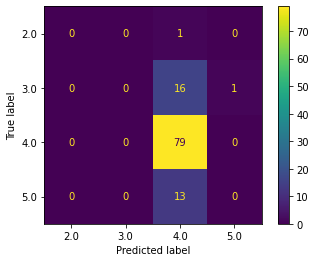

In [87]:
plot_confusion_matrix(best_NB,xts,yts);

In [88]:
#best_params_NB = {'var_smoothing': 1.0}
best_params_NB = grid_search.best_params_
best_params_NB , grid_search.best_score_

({'var_smoothing': 0.8111308307896871}, 0.7001958359101217)

In [ ]:
pred_df = pd.DataFrame(data={'id':df_test['id'], 'rating': y_pred}) # to import the predicted value and put them in a file called pred_walkthrough

pred_df.to_csv('pred_walkthrough.csv', index=False) 

# Questions

In [ ]:
# 1 🌈 Why Data Mining is a misnomer? What is another preferred name?
# 2 🌈 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
# 3 🌈 In data mining, what is the difference between prediction and categorization?
# 4 🌈 Why data science/machine learning is a bad idea in the context of information security?
# 5 🌈 What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

## 1

In [ ]:
# 1  Why Data Mining is a misnomer? What is another preferred name?*

  #  Because the goal and what we are seaking to is to is to extract patterns and knowledge and info
  #  from larg quantities of data not to extract the data itself (mining),
  #  the another preferred name for data mining is knowledge mining or patern mining

## 2 

### a

In [ ]:
# 2 *What is the general knowledge discovery process?*
"knowledge discovery from data" (KDD) refers to the general process of extracting usable information from data.

KDD refers to the overall process of discovering useful knowledge from data. It involves the evaluation
and possibly interpretation of the patterns to make the decision of what qualifies as knowledge. It also includes the choice of encoding
schemes, preprocessing, sampling, and projections of the data prior to the data mining step.
Data mining refers to the application of algorithms for extracting patterns from data without the additional steps of the KDD process.

KDD is a multi-step process involving data preparation, pattern searching, knowledge evaluation, and refinement with
iteration after modification.

###  b

In [ ]:
What is the difference between a data engineer and data scientist/AI engineer?*

A data scientist builds machine learning models on IDE’s

AI engineer builds a deployable version of the model built by data scientists and integrates 
these models with the end product. AI engineers are also responsible for building secure web service APIs for deploying models if required.

In [ ]:
What is the difference between a data engineer and data scientist/AI engineer?*

Data Engineer gathers useful information. For the Data Science team, DE transports and turns this data into "pipelines." Depending on the task, they could employ programming languages like Java, Scala, C++, or Python.

Data Scientists examine, test, aggregate, and optimise data before presenting it to the firm.

## 3

In [ ]:
In data mining, what is the difference between prediction and categorization ?

a categorization is the process of identifying the category or class label of the new observation to which it belongs

b Predication is the process of identifying the missing or unavailable numerical data for a new observation.
The predication does not concern about the class label like in classification.

## 4

In [ ]:
Why data science/machine learning is a bad idea in the context of information security?

Machine learning was not designed with security in mind and as such is prone to adversarial manipulation
 and reverse engineering. While most data based learning models rely on a static assumption of the world,
 the security landscape is one that is especially dynamic, with an ongoing never ending arms race between the system designer
 and the attackers. Any solution designed for such a domain needs to take into account an active adversary 
 and needs to evolve over time, in the face of emerging threats. We term this as the "Dynamic Adversarial Mining" problem

## 5

In [ ]:
# What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

The following is a breakdown of the three key concepts that form the CIA triad:

1 ( Confidentiality ) is roughly equivalent to Confidentiality measures are designed to prevent sensitive information
   from unauthorized access attempts. It is common for data to be categorized according to the amount and type of damage that could be done
   if it fell into the wrong hands. More or less stringent measures can then be implemented according to those categories.

2 Integrity involves maintaining the consistency, accuracy and trustworthiness of data over its entire lifecycle.
   Data must not be changed in transit, and steps must be taken to ensure data cannot be altered by unauthorized people
   (for example, in a breach of confidentiality).

3 Availability means information should be consistently and readily accessible for authorized parties.
   This involves properly maintaining hardware and technical infrastructure and systems that hold and display the information



In [ ]:

*What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?*

Confidentiality, integrity, availability

Confidentiality

Data should be handled in accordance with the organization's privacy requirements.

2FA should be used to encrypt data.

Keep track of access control lists and other file permissions.



Integrity

To reduce human error, make sure employees are aware of compliance and regulatory requirements.

Use software for backup and recovery.

Use version control, access control, security control, data logs, and checksums to ensure integrity.


Availability

Use redundancy, failover, and RAID as preventative measures. Ensure that all systems and applications are up to date.

Monitor your network or server with a network or server monitoring system.

In the event of data loss, make sure you have a data recovery and business continuity (BC) plan in place.